# Predicting Mongolian Crimes with Facebook Prophet

Our main goal is to use existing data to predict crime in Mongolia by using Facebook Prophet. Facebook Prophet is an open source and free library that is created by Facebook. Prophet makes time-series predictions by grounding on the trend, seasonality, and holidays. Thus, we decided to find the trend of certain crimes and try forecasting crime before it happens by using the Facebook Prophet library.

1. Where do most crimes occur? In the capital city or in provinces?
2. What type of crimes occur frequently?
3. Do locations matter for a particular crime occurrence?
4. Is there any seasonal trend for the reported crimes?
5. Are overall trends of reported crimes increasing?
6. What day of the week is crime most common in Mongolia?
7. What month of the year is crime most common in Mongolia?
8. What are the crucial factors for predicting crime?


## Importing Libraries

Let's import the necessary libraries

In [76]:
!pip install fbprophet

In [77]:
!pip install xlrd

In [78]:
import numpy as np 
import pandas as pd
from fbprophet import Prophet
from sklearn import * 
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
mng = plt.get_current_fig_manager()

<Figure size 432x288 with 0 Axes>

## Importing data

Our first dataset, which we stored as crime, is from crimemap.police.gov.mn that is no longer available now.  It was a map that was provided from National Police Agency website and it contained crime reports from 2014 until 2017. We deleted data that do not contain the complete year. Thus, year 2014 and 2017 data are removed.

In [80]:
crime = pd.read_excel('crime.xlsx', thousands = ',')

Our second dataset, which we stored as classes, is from Mongolian Statistical Information Service (1212.mn). It contains cumulative reports of classifications of crime types from 2013 until 2020.

In [81]:
classes = pd.read_csv('1212.csv', thousands = ',')

## Data cleaning and Feature engineering

In [82]:
crime.head(5)

,Гэмт хэргийн төрөл,Хэргийн дугаар,Хэргийн огноо,Хэргийн байршил,Хот/Аймаг,Дүүрэг,Хороо/Сум,Шалгасан ЦХ
0,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Хан-Уул, 15-р хороо, жапан таун,",Улаанбаатар,Хан-Уул,15-р хороо,Хан-Уул дүүрэг дэх цагдаагийн 1-р хэлтэс
1,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Баянгол дүүрэг, 1-р хороо,",Улаанбаатар,Баянгол дүүрэг,1-р хороо,Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс
2,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Хан-Уул, 10-р хороо,",Улаанбаатар,Хан-Уул,10-р хороо,Хан-Уул дүүрэг дэх цагдаагийн 2-р хэлтэс
3,Бусдын бие махбодид гэмтэл учруулах,2.014260e+12,2014-07-01,"Баянгол дүүрэг, 17-р хороо,",Улаанбаатар,Баянгол дүүрэг,17-р хороо,Баянгол дүүрэг дэх цагдаагийн 1-р хэлтэс
4,Хулгайлах - Иргэдийн өмч,2.014250e+12,2014-07-01,"Чингэлтэй дүүрэг, 12-р хороо, булгийн,",Улаанбаатар,Чингэлтэй дүүрэг,12-р хороо,Чингэлтэй дүүрэг дэх цагдаагийн 2-р хэлтэс


In [83]:
classes.head()

,Classification of crime,2013-01,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,Total,2327,2651,4452,6672,9119,11445,13565,15628,17615,...,15800.0,17666.0,20435.0,23120.0,26314.0,28599.0,30011.0,31524.0,3474.0,6745.0
1,Minor,1008,1143,1992,3038,4253,5289,6356,7326,8280,...,12602.0,14087.0,16267.0,18429.0,20899.0,22763.0,23977.0,25156.0,2773.0,5484.0
2,Less serious,1108,1313,2118,3040,4044,5118,5978,6882,7740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Serious,175,161,284,480,656,816,971,1124,1238,...,3198.0,3579.0,4168.0,4691.0,5415.0,5836.0,6034.0,6368.0,701.0,1261.0
4,Grave,36,34,58,114,166,222,260,296,357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2014 and 2017 should be removed. Because only 2015-2016 is complete for that dataset. 

In [84]:
crime = crime[crime['Хэргийн огноо'] > '2014-12-31'] 
crime = crime[crime['Хэргийн огноо'] < '2017-01-01'] 
crime.head(2)

,Гэмт хэргийн төрөл,Хэргийн дугаар,Хэргийн огноо,Хэргийн байршил,Хот/Аймаг,Дүүрэг,Хороо/Сум,Шалгасан ЦХ
5622,Хулгайлах - Иргэдийн өмч,2.015260e+11,2015-01-01,"Баянгол дүүрэг, 23-р хороо, 10,",Улаанбаатар,Баянгол дүүрэг,23-р хороо,Баянгол дүүрэг дэх цагдаагийн 1-р хэлтэс
5623,Бусдын бие махбодид гэмтэл учруулах,2.015120e+11,2015-01-01,"Дундговь аймаг Гурвансайхан сум, 3-р хороо,",Дундговь,NaN,Гурвансайхан сум,Дундговь аймаг дахь ЦГ


In [85]:
crime['Хэргийн огноо'].unique()

array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', '2015-01-04T00:00:00.000000000',
       '2015-01-05T00:00:00.000000000', '2015-01-06T00:00:00.000000000',
       '2015-01-07T00:00:00.000000000', '2015-01-08T00:00:00.000000000',
       '2015-01-09T00:00:00.000000000', '2015-01-10T00:00:00.000000000',
       '2015-01-11T00:00:00.000000000', '2015-01-12T00:00:00.000000000',
       '2015-01-13T00:00:00.000000000', '2015-01-14T00:00:00.000000000',
       '2015-01-15T00:00:00.000000000', '2015-01-16T00:00:00.000000000',
       '2015-01-17T00:00:00.000000000', '2015-01-18T00:00:00.000000000',
       '2015-01-19T00:00:00.000000000', '2015-01-20T00:00:00.000000000',
       '2015-01-21T00:00:00.000000000', '2015-01-22T00:00:00.000000000',
       '2015-01-23T00:00:00.000000000', '2015-01-24T00:00:00.000000000',
       '2015-01-25T00:00:00.000000000', '2015-01-26T00:00:00.000000000',
       '2015-01-27T00:00:00.000000000', '2015-01-28

#### Classifications of Crime

In [86]:
classes = classes.set_index('Classification of crime').T
classes = classes.reset_index()

In [87]:
classes = classes.rename(columns={'index': 'date'})

In [88]:
classes.dtypes

Classification of crime
date             object
Total           float64
Minor           float64
Less serious    float64
Serious         float64
Grave           float64
dtype: object

In [89]:
classes['date'] = pd.to_datetime(classes['date'])
classes.dtypes

Classification of crime
date            datetime64[ns]
Total                  float64
Minor                  float64
Less serious           float64
Serious                float64
Grave                  float64
dtype: object

## Exploratory Data Analysis

#### 1.Where do most crimes occur? In the capital city or in provinces?

In [90]:
crime['Гэмт хэргийн төрөл'].value_counts()

Бусдын бие махбодид гэмтэл учруулах    16192
Хулгайлах - Иргэдийн өмч               14360
Танхайрах                               2998
ТХХАББАЖЗ                               2963
Хулгайлах - Мал                         1838
Хулгайлах - Халаас                      1255
Дээрэмдэх                                996
Хулгайлах - Тээврийн хэрэгсэл            774
Хүчиндэх                                 578
Булаах                                   418
Хүнийг санаатай алах                     366
Name: Гэмт хэргийн төрөл, dtype: int64

In [91]:
crime['Гэмт хэргийн төрөл'].value_counts().index

Index(['Бусдын бие махбодид гэмтэл учруулах', 'Хулгайлах - Иргэдийн өмч',
       'Танхайрах', 'ТХХАББАЖЗ', 'Хулгайлах - Мал', 'Хулгайлах - Халаас',
       'Дээрэмдэх', 'Хулгайлах - Тээврийн хэрэгсэл', 'Хүчиндэх', 'Булаах',
       'Хүнийг санаатай алах'],
      dtype='object')

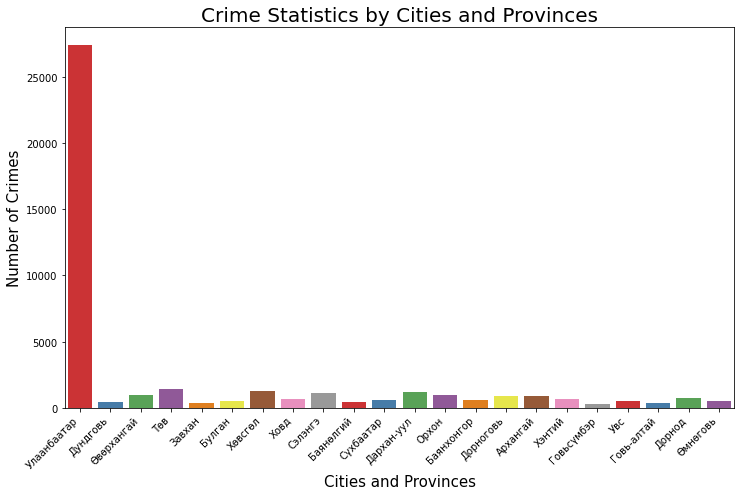

In [92]:
plt.figure(figsize=(12,7))
chart = sns.countplot(
    data=crime,
    x='Хот/Аймаг',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Cities and Provinces', size=15)
plt.ylabel('Number of Crimes', size=15)
plt.title('Crime Statistics by Cities and Provinces', size=20)
plt.savefig(fname='1')

Visualizing the crimes dataset tells that Ulaanbaatar city has the most crime reports. Furthermore, almost one third of the population live in the capital city. 


#### 2. What type of crimes occur frequently?

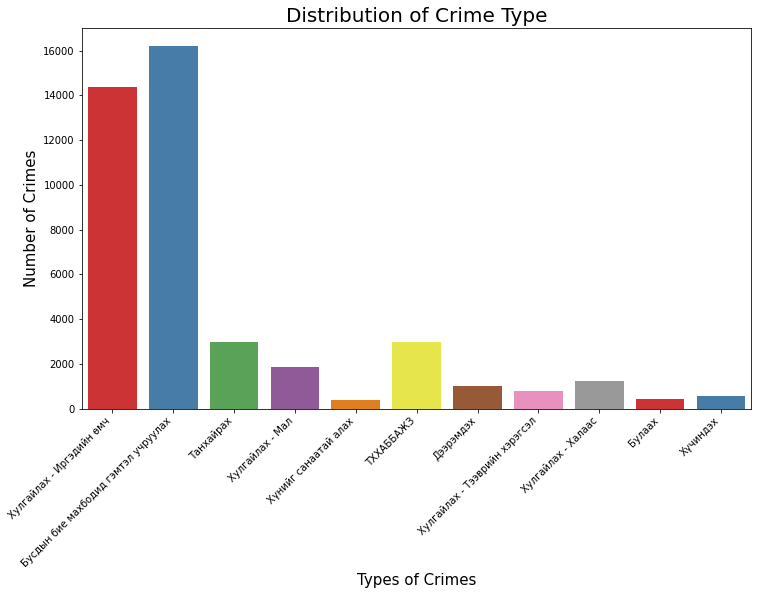

In [93]:
plt.figure(figsize=(12, 7))
chart = sns.countplot(
    data=crime,
    x='Гэмт хэргийн төрөл',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Types of Crimes', size=15)
plt.ylabel('Number of Crimes', size=15)
plt.title('Distribution of Crime Type', size=20)
plt.savefig(fname='Distribution of Crime Type')

By looking at the distribution of crime types, we can see that assault which is a blue bar and theft which is red bar are the most reported crimes. The answer of frequently occurring crimes was not surprising at all. There were several travel related blogs that warned tourists to keep their belongings safe and not to walk alone at night.


#### 3. Do locations matter for a particular crime occurrence?

In [94]:
crime_ub = crime[crime['Хэргийн байршил'].str.contains("дүүрэг|Хан-Уул")]

In [95]:
crime_ub['Хэргийн байршил'] = crime_ub['Хэргийн байршил'].str.split().str.get(0)

C:\Users\anuda\Anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
crime_ub['Хэргийн байршил'] = crime_ub['Хэргийн байршил'].replace('Өмнөговь', np.nan)
crime_ub['Хэргийн байршил'] = crime_ub['Хэргийн байршил'].replace('Дорнод', np.nan)
crime_ub['Хэргийн байршил'] = crime_ub['Хэргийн байршил'].replace('Хан-Уул', np.nan)

C:\Users\anuda\Anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anuda\Anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anuda\Anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [97]:
crime_ub['Хэргийн байршил'] = crime_ub['Хэргийн байршил'].dropna()

C:\Users\anuda\Anaconda3\envs\ml-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
crime_ub['Хэргийн байршил'].value_counts()

Баянзүрх          6749
Сонгинохайрхан    5235
Сүхбаатар         4676
Баянгол           4518
Чингэлтэй         3047
Хан-Уул,          2045
Налайх             627
Name: Хэргийн байршил, dtype: int64

In [99]:
df = crime_ub['Хэргийн байршил'].value_counts()

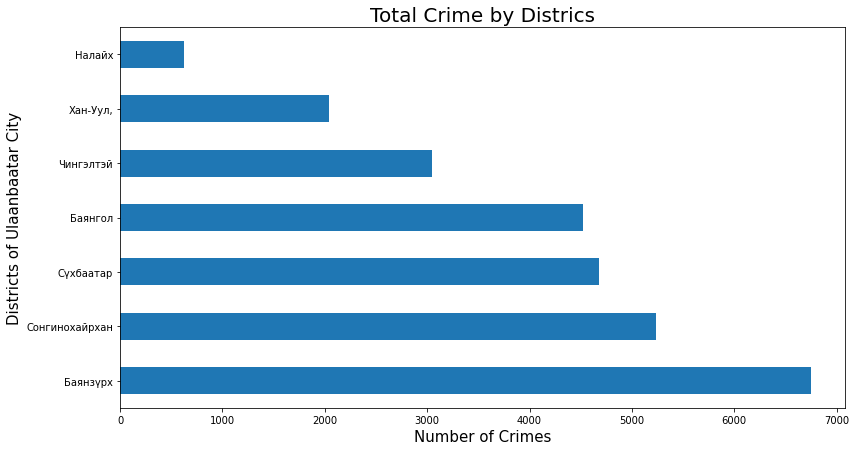

In [100]:
df.plot(kind='barh', figsize=(13,7))
plt.xlabel('Number of Crimes', size=15)
plt.ylabel('Districts of Ulaanbaatar City', size=15)
plt.title('Total Crime by Districs', size=20)
plt.savefig(fname='Districts')

According to Total Crime Reports, Bayanzurkh is the most dangerous district with the most crime reports. Whereas, Nalaikh and Khan-Uul districts are considered safest with the lowest crime rate.

## Making Predictions with Facebook Prophet

We used Facebook Prophet, an automated forecast, for the predictions. The reason why Facebook Prophet can be useful for forecasting is that we wanted to know whether crime reports have similarities with one another. Do they have seasonal or repeatable trends that we can use to make predictions?

### Working on the Classification Dataset

In [101]:
total = pd.DataFrame(data=classes.date,columns=['ds'])
total['ds'] = classes['date']
total['y'] = classes['Total']

Facebook Prophet requires a numeric y variable and one dataOur y variable which is our output variable is the total numbers of crime from classes dataset. Using 95 percent intervals, we defined upper and lower intervals. 


In [102]:
total.head()

,ds,y
0,2013-01-01,2327.0
1,2014-01-01,2651.0
2,2014-02-01,4452.0
3,2014-03-01,6672.0
4,2014-04-01,9119.0


In [103]:
fb = Prophet()
fb.fit(total)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
future = fb.make_future_dataframe(periods=365)
future.tail()

,ds
435,2021-01-27
436,2021-01-28
437,2021-01-29
438,2021-01-30
439,2021-01-31


Estimating our confidence interval by 95% 

In [105]:
forecast = Prophet(interval_width=0.95).fit(total).predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
435,2021-01-27,9353.768704,6691.573844,12153.331914
436,2021-01-28,8796.479681,6071.362528,11535.961246
437,2021-01-29,8393.709847,5618.979358,11300.997624
438,2021-01-30,8152.182908,5532.767111,10715.380569
439,2021-01-31,8073.670040,5360.090892,10970.621937


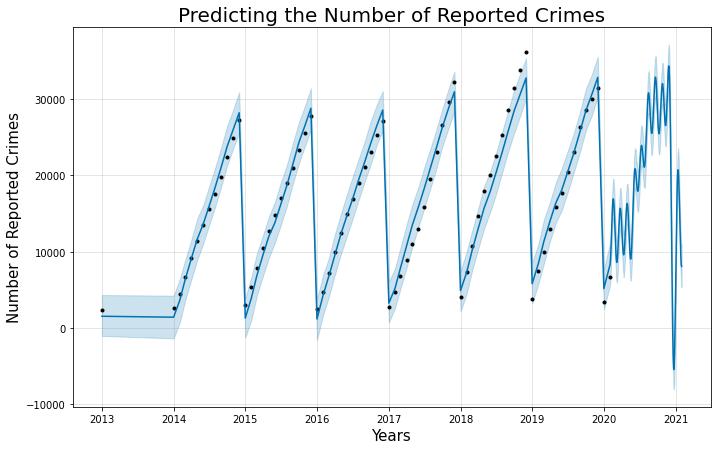

In [106]:
fig1 = fb.plot(forecast)
plt.xlabel('Years', size=15)
plt.ylabel('Number of Reported Crimes', size=15)
plt.title('Predicting the Number of Reported Crimes', size=20)
plt.savefig(fname='3')
plt.show()

Here is the trend of Reported Crimes. Because our dataset contains the cumulative total number of reported crimes, the shapes of our predicted values are increasing each year and decreasing in the beginning of the next year. That’s how our visualization looks like one acute triangle for one-year interval.

### Working on the Crime dataset

In [107]:
crime = crime.groupby('Хэргийн огноо').count()['Гэмт хэргийн төрөл'].to_frame()
crime.reset_index(inplace=True)
crime.columns = ['ds','y']
crime.head()

,ds,y
0,2015-01-01,47
1,2015-01-02,42
2,2015-01-03,55
3,2015-01-04,40
4,2015-01-05,79


In [108]:
pd.plotting.register_matplotlib_converters()

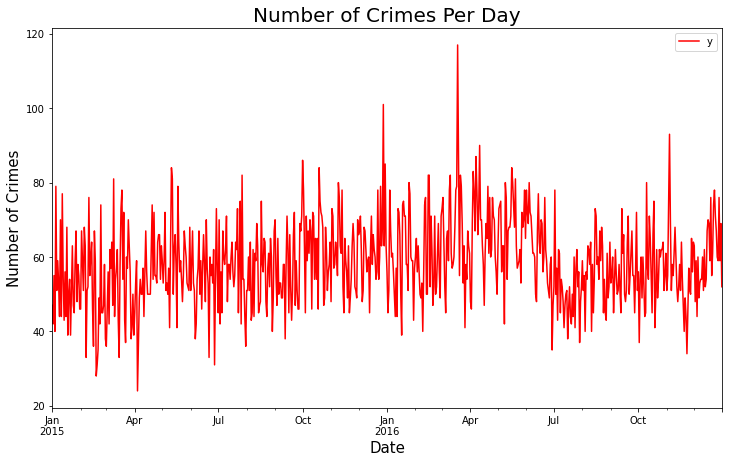

In [109]:
crime.plot(x='ds', color = 'red', figsize=(12, 7))
plt.xlabel('Date', size=15)
plt.ylabel('Number of Crimes', size=15)
plt.title('Number of Crimes Per Day', size=20)
plt.savefig(fname='4')
plt.show()

The visualization of daily crime reports is mainly used for outlier detection. We can identify that December and April contain huge outliers.


## Making Forecasts on The Crime Dataset.

### The simple model with Outliers

In [110]:
cd = crime.copy()

In [111]:
cd['y'] = np.log(cd['y'])

Because of the fact that the number of reported crimes that we have is not constantly increasing and decreasing, we decided to use logarithm transformation on our y variable. By doing that, we can transform the spike waveforms and normalize the target variable. Our log-normalized data will also increase the accuracy of the prediction, by making differences of the variables less. Also, it is widely used for transforming data with the continuous outcomes

In [112]:
fb1 = Prophet(interval_width=0.95)
fb1.fit(cd)
future1 = fb1.make_future_dataframe(periods = 365)
forecast1 = fb1.predict(future1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


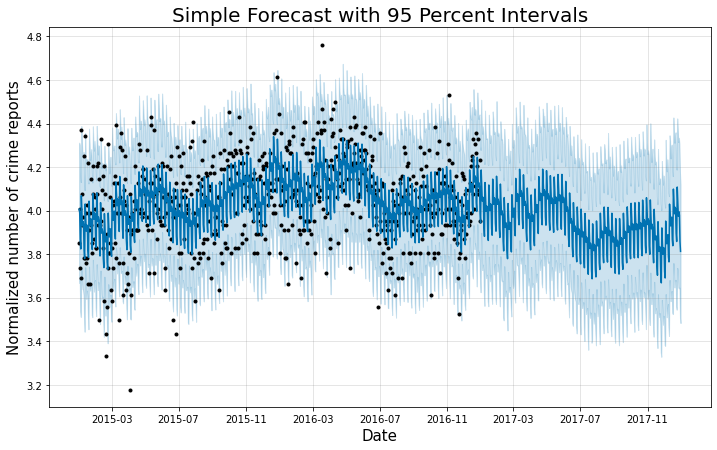

In [114]:
fb1.plot(forecast1);
plt.xlabel('Date', size=15)
plt.ylabel('Normalized number of crime reports', size=15)
plt.title('Simple Forecast with 95 Percent Intervals', size=20)
plt.savefig(fname='12')
plt.show()

- The blue line - predicted values
- The black dots - actual values
- Light blue lines - Upper and Lower confidence intervals 

#### Forecast components 

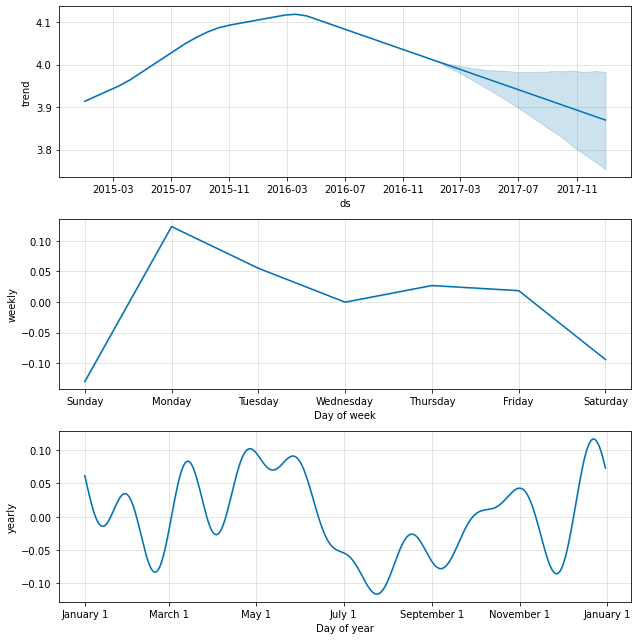

In [115]:
fb1.plot_components(forecast1)
plt.savefig(fname='6')

In [116]:
np.exp(forecast1[['yhat','yhat_lower','yhat_upper']])

,yhat,yhat_lower,yhat_upper
0,54.988559,39.168268,74.591704
1,54.052550,39.746621,73.949991
2,47.874166,34.353769,65.234342
3,45.770778,33.510658,62.238131
4,58.462467,41.996017,80.470766
...,...,...,...
1091,53.233543,38.337353,74.798757
1092,54.330183,38.202676,76.279097
1093,53.464813,38.351552,74.224982
1094,47.372260,33.351058,65.010838


In [117]:
future1

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
1091,2017-12-27
1092,2017-12-28
1093,2017-12-29
1094,2017-12-30


### The Second Model with Additional Holiday Dates.

In [118]:
tsagaansar = pd.DataFrame({
  'holiday': 'tsagaansar',
  'ds': pd.to_datetime(['2015-02-19', '2015-02-20', '2015-02-21',
                        '2015-02-22', '2015-02-23', '2015-02-24',
                        '2015-02-25', '2015-02-26', '2016-02-08',
                        '2016-02-09', '2016-02-10', '2016-02-11',
                        '2016-02-12', '2016-02-13','2016-02-14','2016-02-15']),
  'lower_window': 0,
  'upper_window': 1,
})
newyear = pd.DataFrame({
  'holiday': 'newyear',
  'ds': pd.to_datetime(['2015-01-01', '2015-12-31', '2016-01-01','2016-12-31']),
  'lower_window': 0,
  'upper_window': 1,
})
naadam = pd.DataFrame({
  'holiday': 'naadam',
  'ds': pd.to_datetime(['2015-07-11', '2015-07-12', '2015-07-13',
                       '2016-07-11','2016-07-12','2016-07-13']),
  'lower_window': 0,
  'upper_window': 1,
})  
childrensday = pd.DataFrame({
  'holiday': 'childrensday',
  'ds': pd.to_datetime(['2015-06-01','2016-06-01']),
  'lower_window': 0,
  'upper_window': 1,
})  
mart8 = pd.DataFrame({
  'holiday': 'mart8',
  'ds': pd.to_datetime(['2015-03-08','2016-03-08']),
  'lower_window': 0,
  'upper_window': 1,
})  
soldiersday = pd.DataFrame({
  'holiday': 'soldiersday',
  'ds': pd.to_datetime(['2015-03-18','2016-03-18']),
  'lower_window': 0,
  'upper_window': 1,
})  
republicday = pd.DataFrame({
  'holiday': 'republicday',
  'ds': pd.to_datetime(['2015-11-26','2016-11-26']),
  'lower_window': 0,
  'upper_window': 1,
})  
independenceday = pd.DataFrame({
  'holiday': 'independenceday',
  'ds': pd.to_datetime(['2015-12-29','2016-12-29']),
  'lower_window': 0,
  'upper_window': 1,
})  

holidays = pd.concat((tsagaansar,newyear,mart8,soldiersday,independenceday,republicday,childrensday,naadam))

We added Mongolian big holidays to our data in order to define the impact of holidays to the number of reported crimes. We added a list that contains Mongolian big holidays and used prophet with 95 percent intervals to make predictions. Then, we fit the data.


In [119]:
fb3 = Prophet(holidays=holidays,interval_width = 0.95)

In [120]:
fb3.fit(cd)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
future = fb3.make_future_dataframe(periods=365)

In [122]:
forecast3 = fb3.predict(future)

In [123]:
np.exp(forecast3[['yhat','yhat_lower','yhat_upper']])

,yhat,yhat_lower,yhat_upper
0,52.500233,38.989902,72.670901
1,44.071653,32.715825,58.032550
2,49.183992,36.144377,68.025556
3,47.028502,34.911476,63.892464
4,60.114660,43.011382,82.061434
...,...,...,...
1091,52.807999,38.547406,72.230268
1092,54.460841,39.130562,78.125846
1093,53.253076,37.726487,74.000009
1094,47.436642,34.926332,65.516095


Afterwards we used a numpy exponential function for identifying lower and upper 95 intervals.

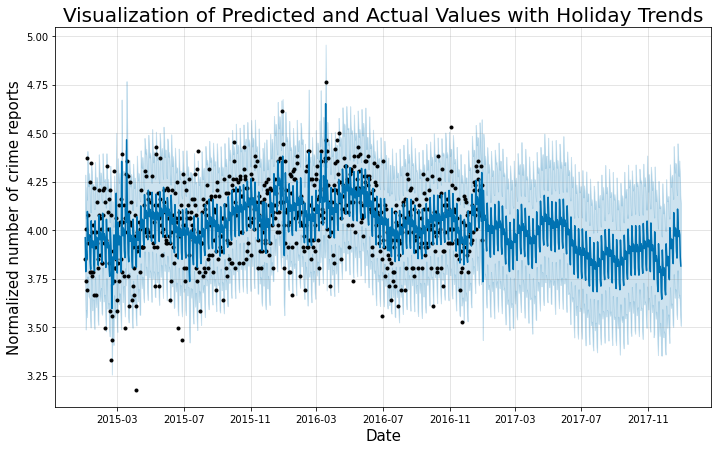

In [124]:
fb3.plot(forecast3);
plt.xlabel('Date', size=15)
plt.ylabel('Normalized number of crime reports', size=15)
plt.title('Visualization of Predicted and Actual Values with Holiday Trends', size=20)
plt.show()

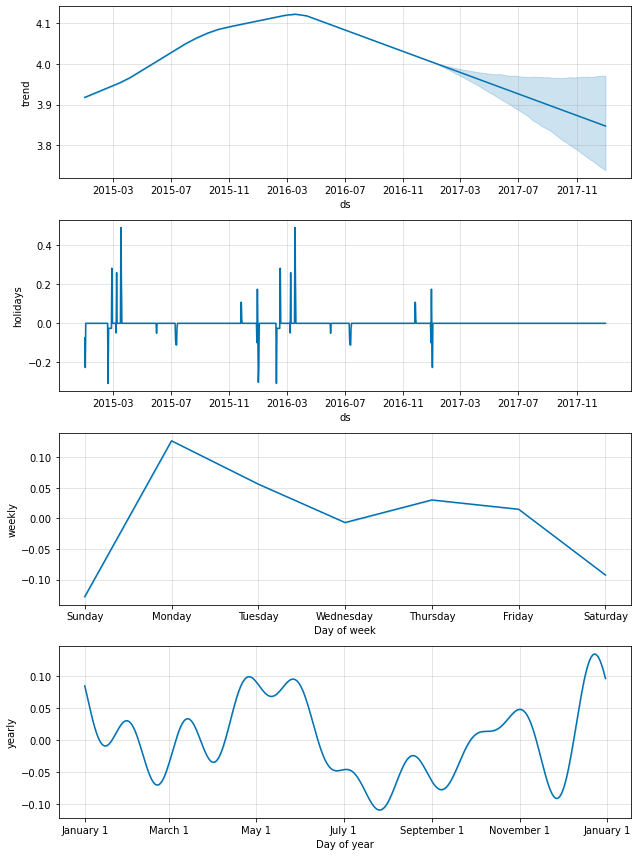

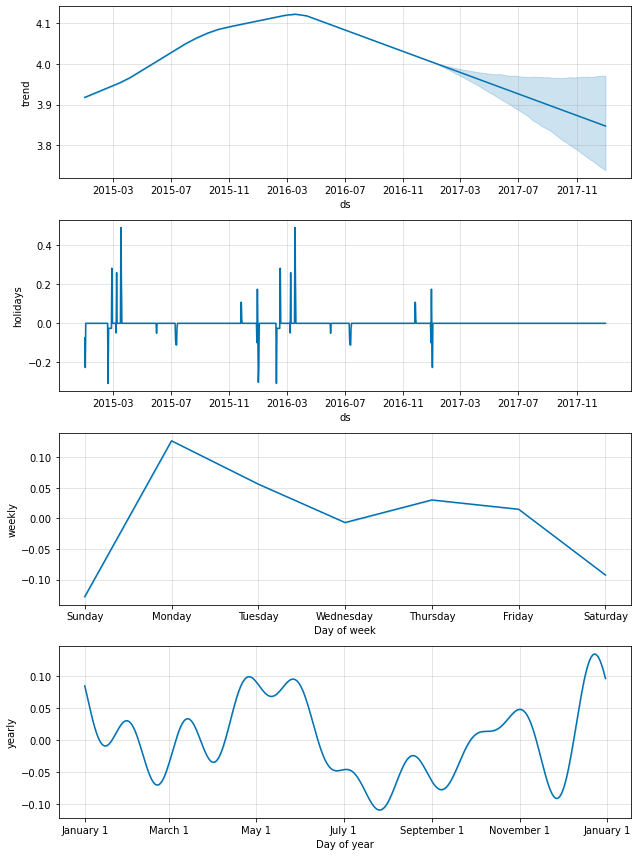

In [125]:
fb3.plot_components(forecast3)


#### 4. Is there any seasonal trend for the reported crimes?
- From the second chart that has holiday on the y-axis and ds (datestamp) on the x-axis, we can see the influence of holidays in crime.

#### 5. Are overall trends of reported crimes increasing?
- From the second chart that has holiday on the y-axis and ds (datestamp) on the x-axis, we can see the influence of holidays in crime.

#### 6. What day of the week is crime most common in Mongolia?
- Third component describes the prediction of the day when the crime is most likely to occur.

#### 7. What month of the year is crime most common in Mongolia?-First component shows that the overall trend of crime is decreasing over the years
- The last component visualizes the months of the year and crimes reported during that month. 

## The Third Model without Outliers

The model would perform much better than the previous models by removing outliers

In [126]:
cd1 = crime.copy()

According to the Empirical rules, Approximately 95% of the data falls within two standard deviations of the mean. So, we will find outliers byestimating UCL and LCL  as 2 standard deviations (95%) from the mean.

In [127]:
ucl = cd1.mean() + cd1.std()*2

In [128]:
lcl = cd1.mean() - cd1.std()*2

In [129]:
ucl

y    81.272452
dtype: float64

In [130]:
cd1.mean()

y    58.465116
dtype: float64

In [131]:
lcl

y    35.65778
dtype: float64

Outliers found:  

In [132]:
print('Above 2 standard deviations: ', cd1[cd1['y'] > ucl['y']]['y'].count())
print('Below 2 standard deviations: ', cd1[cd1['y'] < lcl['y']]['y'].count())

Above 2 standard deviations:  17
Below 2 standard deviations:  10


Removing outliers by replacing their value with None. 

In [133]:
cd1.loc[cd1['y'] > ucl['y'], 'y'] = None
cd1.loc[cd1['y'] < lcl['y'], 'y'] = None

In [134]:
cd1['y'] = np.log(cd1['y'])

Prediction...

In [135]:
fb2 = Prophet(interval_width = 0.95)

In [136]:
fb2.fit(cd1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [137]:
future2 = fb2.make_future_dataframe(periods=365)

In [138]:
forecast2 = fb2.predict(future2)

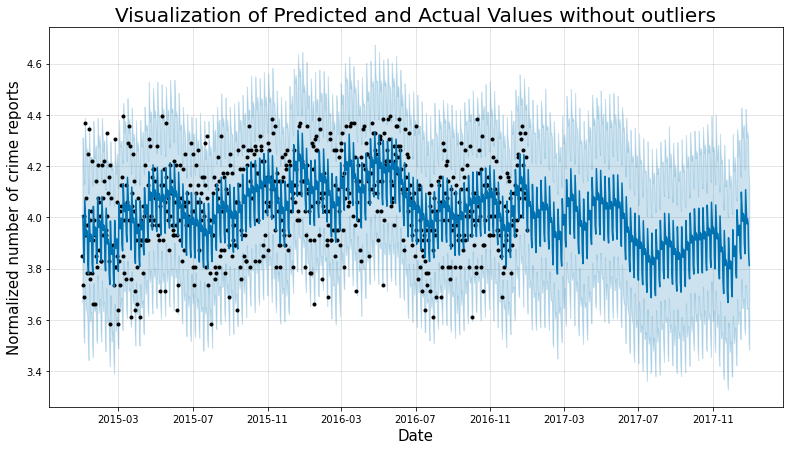

In [139]:
fb2.plot(forecast1, figsize=(11, 6));
plt.xlabel('Date', size=15)
plt.ylabel('Normalized number of crime reports', size=15)
plt.title('Visualization of Predicted and Actual Values without outliers', size=20)
plt.show()

In [140]:
np.exp(forecast2[['yhat','yhat_lower','yhat_upper']])

,yhat,yhat_lower,yhat_upper
0,55.323002,40.916235,73.911870
1,54.308844,40.720880,72.429785
2,49.012092,36.461554,65.327981
3,46.751272,35.159348,61.956277
4,57.975901,43.145024,77.831586
...,...,...,...
1091,54.992198,40.303106,74.457977
1092,55.218443,41.062423,73.611934
1093,54.253492,41.085552,73.087340
1094,48.974815,36.273115,65.070764


## Model Evaluation 

Model Evaluation helps to find the best model that represents our data. Facebook Prophet includes functionality for time series cross-validation to measure forecast error using historical data. So, we will compare the predicted values with the actual values by using the cross-validation method in Prophet. The CV method take the parameters that are: <br> __horizon__ - Forecast horizon <br>__initial__ - size of the initial training period <br>__period__ -the spacing between cutoff dates



In [141]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [142]:
df_cv1 = cross_validation(fb1, horizon = "90 days",period='7 days')
df_cv2 = cross_validation(fb3, horizon = "90 days",period='7 days')
df_cv3 = cross_validation(fb2, horizon = "90 days",period='7 days')

INFO:fbprophet:Making 40 forecasts with cutoffs between 2016-01-03 00:00:00 and 2016-10-02 00:00:00
INFO:fbprophet:Making 40 forecasts with cutoffs between 2016-01-03 00:00:00 and 2016-10-02 00:00:00
INFO:fbprophet:Making 40 forecasts with cutoffs between 2016-01-03 00:00:00 and 2016-10-02 00:00:00


In [143]:
df_p1 = performance_metrics(df_cv1)
df_p2 = performance_metrics(df_cv2)
df_p3 = performance_metrics(df_cv3)


In [144]:
df_p1.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,0.037134,0.192701,0.154536,0.038098,0.032557,0.900000
1,10 days,0.037493,0.193632,0.153337,0.037891,0.031545,0.897222
2,11 days,0.036946,0.192212,0.152046,0.037523,0.032557,0.902778
3,12 days,0.038475,0.196150,0.155520,0.038343,0.033437,0.891667
4,13 days,0.039140,0.197838,0.157262,0.038826,0.033437,0.894444


In [145]:
df_p2.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,0.037000,0.192354,0.155405,0.038379,0.033613,0.894444
1,10 days,0.037667,0.194079,0.154970,0.038346,0.032923,0.886111
2,11 days,0.037083,0.192569,0.154023,0.038043,0.033613,0.886111
3,12 days,0.037242,0.192981,0.154976,0.038293,0.033960,0.883333
4,13 days,0.038105,0.195205,0.156610,0.038753,0.033705,0.875000


In [146]:
df_p3.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,0.031620,0.177821,0.143695,0.035593,0.029571,0.913665
1,11 days,0.030292,0.174045,0.140856,0.034869,0.029285,0.919075
2,12 days,0.031187,0.176599,0.142043,0.035256,0.029285,0.907514
3,13 days,0.031866,0.178509,0.144287,0.035860,0.029831,0.907663
4,14 days,0.032590,0.180528,0.146074,0.036335,0.030297,0.899585


In [147]:
from fbprophet.plot import plot_cross_validation_metric

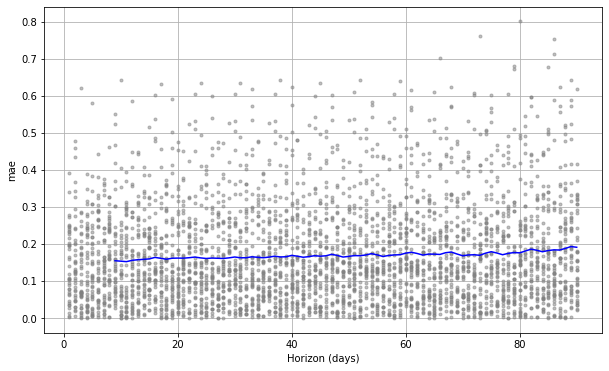

In [148]:
# First model (Simple model)
plot_cross_validation_metric(df_cv1, metric = 'mae');

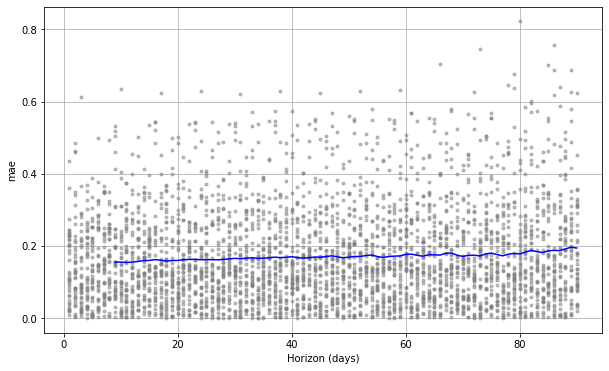

In [149]:
# Model 2 (With additional holiday dates)
plot_cross_validation_metric(df_cv2, metric='mae');

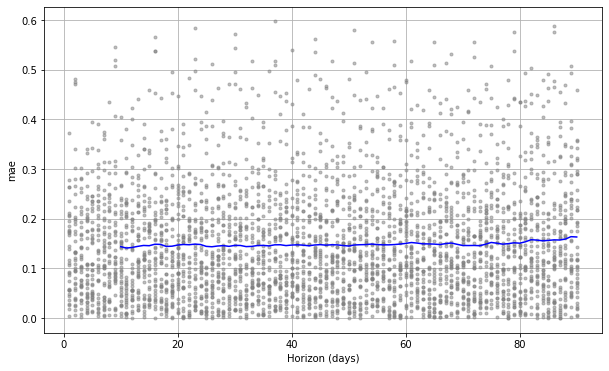

In [150]:
# Model 3 (Without outliers)
plot_cross_validation_metric(df_cv3, metric='mae');

### Conclusion:

In [151]:
print('MAE score (model 1):',df_p1['mae'].mean(), '---> Simple')
print('MAE score (model 2):',df_p2['mae'].mean(), '---> With additional holiday dates')
print('MAE score (model 3):',df_p3['mae'].mean(), '---> Without outliers')

MAE score (model 1): 0.1689511305797612 ---> Simple
MAE score (model 2): 0.17048098296025194 ---> With additional holiday dates
MAE score (model 3): 0.1484561874804669 ---> Without outliers


When defining factors that impact the accuracy of our crime predictions in the future, seasonal spikes and dates of Mongolian holiday played an important role. Adding lists with holiday dates also decreased our mean absolute error.

In conclusion, with the help of Facebook Prophet algorithm, we successfully predicted the repeatable trend of crime reports with 14.8% error.   By looking at the trend of crime, it is surprising to know that Mondays of the week have the highest crime occurrences and crime rate hits its highest numbers right before the New Year in Mongolia. 
